In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns


In [2]:
path = r'/Users/jonathan.phelan/Downloads/teacher_salary_data' # use your path
all_files = glob.glob(path + "/*.csv")


In [4]:
all_files

['/Users/jonathan.phelan/Downloads/teacher_salary_data/2006_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2008_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2005_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2004_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2009_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2003_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2007_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2011_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2010_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2012-tsr-public-dataset.csv']

In [5]:
dfs=[]


for i in all_files:
    file=pd.read_csv(i)
    file_name=str(i)
    file_name=file_name.split('/')[5]
    file['filename']=file_name
    dfs.append(file)
    

master_df = pd.concat(dfs, axis=0, ignore_index=True)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,34,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,7,8,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
master_df['year']=master_df['filename'].str[0:4]
master_df['year'].value_counts()

2010    167821
2009    167743
2008    164325
2011    163228
2012    162960
2007    160869
2005    160566
2006    159909
2003    159250
2004    158216
Name: year, dtype: int64

In [7]:
master_df.shape

(1624887, 63)

In [8]:
master_df.head()

,fy,rcdt,dst_name,dst_addr,dst_city,dst_st,dst_zip,dst_zip_plus4,sch_num,sch_name,...,assign4_desc,assignment_5,assign5_desc,assignment_6,assign6_desc,assignment_7,assign7_desc,pct_admin,filename,year
0,2006,05016036002,Winnetka SD 36,1235 Oak St,Winnetka,IL,60093.0,2168,1005,Carleton W Washburne School,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006
1,2006,34049220026,Barrington CUSD 220,310 James St,Barrington,IL,60010.0,3329,0004,Barrington High School,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006
2,2006,31045046022,SD U-46,355 E Chicago St,Elgin,IL,60120.0,6543,1003,Abbott Middle School,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006
3,2006,19022086017,Hinsdale Twp HSD 86,5500 S Grant St,Hinsdale,IL,60521.0,4578,0002,Hinsdale South High School,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006
4,2006,05016028002,Northbrook SD 28,1475 Maple Ave,Northbrook,IL,60062.0,5418,2002,Greenbriar Elem School,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006


In [9]:
for i in master_df.columns:
    print (i,'--',master_df[i].dtype, master_df[i].isnull().sum())

fy -- int64 0
rcdt -- object 0
dst_name -- object 41
dst_addr -- object 41
dst_city -- object 41
dst_st -- object 41
dst_zip -- float64 41
dst_zip_plus4 -- object 41
sch_num -- object 0
sch_name -- object 21
sch_addr -- object 121104
sch_city -- object 121104
sch_st -- object 121104
sch_zip -- float64 121104
sch_zip_plus4 -- object 121104
last_name -- object 0
first_name -- object 0
mid_init -- object 0
gender -- object 0
race_ethnicity_cd -- object 328
race_ethnicity_desc -- object 419
tsr_status_cd -- int64 0
tsr_status_desc -- object 0
location_cd -- object 9
location_desc -- object 54
emply_type -- object 0
emply_desc -- object 222
salary -- float64 0
months_employed -- int64 0
pct_emp -- int64 0
fte -- int64 0
dist_exp -- float64 0
state_exp -- float64 0
out_of_state_exp -- float64 0
bacc_coll -- object 0
bacc_coll_desc -- object 6390
high_degre_cd -- int64 0
high_degre_desc -- object 3
adv_coll -- object 0
adv_coll_desc -- object 660937
pos_cd -- int64 0
pos_desc -- object 0
low_

In [10]:
master_df['salary'].describe()

count    1.624887e+06
mean     6.110860e+04
std      2.446809e+04
min      0.000000e+00
25%      4.424000e+04
50%      5.687100e+04
75%      7.417092e+04
max      4.416120e+05
Name: salary, dtype: float64

In [11]:
#Show mean salary by zip and year.
salaries_zip=pd.pivot_table(data=master_df, index='sch_zip', values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
salaries_zip
#Create a summary table of salary with different stats.
#salaries=pd.pivot_table(data=master_df, index='year', values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])

,amin,amax,median,mean,std,len
,salary,salary,salary,salary,salary,salary
sch_zip,,,,,,
60002.0,0.00,155317.02,49805.910,53868.296851,19943.940509,3681.0
60004.0,0.00,202678.99,68722.840,71466.906838,28478.613787,5544.0
60005.0,0.00,166748.40,63840.105,66779.834125,24050.643515,2400.0
60007.0,0.00,201503.10,71673.035,74319.824945,26398.334910,5110.0
60008.0,0.00,198583.92,76478.555,77620.962546,27342.378622,4038.0
60010.0,0.00,188754.60,63088.415,69055.041420,26707.653685,6372.0
60012.0,20322.68,174207.78,78604.125,80365.826349,27714.821616,1090.0
60013.0,786.80,441612.00,67015.310,69322.390903,26542.480867,3423.0


In [12]:
salaries_year=pd.pivot_table(data=master_df, index='year', values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
salaries_year



,amin,amax,median,mean,std,len
,salary,salary,salary,salary,salary,salary
year,,,,,,
2003,0.0,353351.13,49453.035,53563.648411,20871.232120,159250.0
2004,0.0,302746.00,51318.925,55572.548637,21876.153527,158216.0
2005,0.0,361146.50,53114.770,57506.508290,22555.739792,160566.0
2006,0.0,441612.00,54261.000,58711.686940,23106.998096,159909.0
2007,0.0,385378.73,55285.570,59480.385759,24400.076287,160869.0
2008,0.0,411510.88,58197.000,62772.906433,24562.081862,164325.0
2009,0.0,368589.94,59046.370,63358.091819,24630.648975,167743.0
2010,0.0,413000.00,60701.470,64910.817892,25319.613269,167821.0


In [13]:
salaries_year.columns = salaries_year.columns.get_level_values(0)
salaries_year

,amin,amax,median,mean,std,len
year,,,,,,
2003,0.0,353351.13,49453.035,53563.648411,20871.232120,159250.0
2004,0.0,302746.00,51318.925,55572.548637,21876.153527,158216.0
2005,0.0,361146.50,53114.770,57506.508290,22555.739792,160566.0
2006,0.0,441612.00,54261.000,58711.686940,23106.998096,159909.0
2007,0.0,385378.73,55285.570,59480.385759,24400.076287,160869.0
2008,0.0,411510.88,58197.000,62772.906433,24562.081862,164325.0
2009,0.0,368589.94,59046.370,63358.091819,24630.648975,167743.0
2010,0.0,413000.00,60701.470,64910.817892,25319.613269,167821.0
2011,0.0,358750.55,62437.800,66587.655456,25734.274994,163228.0


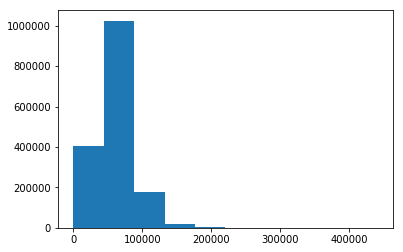

In [14]:
master_df['salary'].hist().grid(False)

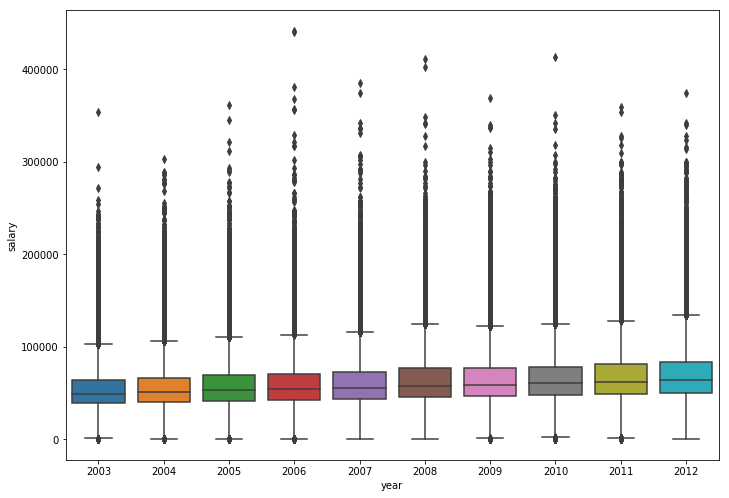

In [15]:
#Show boxplot of salaries by zipcode.
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x="year", y="salary", data=master_df)



In [16]:
#fig, ax = plt.subplots()
#fig.set_size_inches(11.7, 8.27)
#sns.boxplot(x="race_ethnicity_cd", y="salary", data=master_df)
salaries_race=pd.pivot_table(data=master_df, index='race_ethnicity_desc', values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
salaries_race

,amin,amax,median,mean,std,len
,salary,salary,salary,salary,salary,salary
race_ethnicity_desc,,,,,,
American Indian or Alaska Native,0.0,184340.00,70127.280,71120.152378,21955.899352,513.0
American Indian or Alaskan Native,41.0,220973.56,57444.500,59168.145412,18946.046078,1989.0
Asian,0.0,358750.55,65417.500,67984.604635,24188.913921,3810.0
Asian or Pacific Islander,0.0,341747.61,56276.000,59485.342558,21385.396091,14474.0
Black or African American,0.0,323866.46,77870.000,76742.546664,25515.640612,24547.0
"Black, Non-Hispanic",0.0,439803.00,67444.450,68521.569210,22877.743596,120308.0
Hispanic,0.0,242825.66,57915.500,60896.729052,21176.995267,55844.0
Hispanic or Latino,0.0,254426.14,68448.000,70160.637726,23200.183667,15745.0


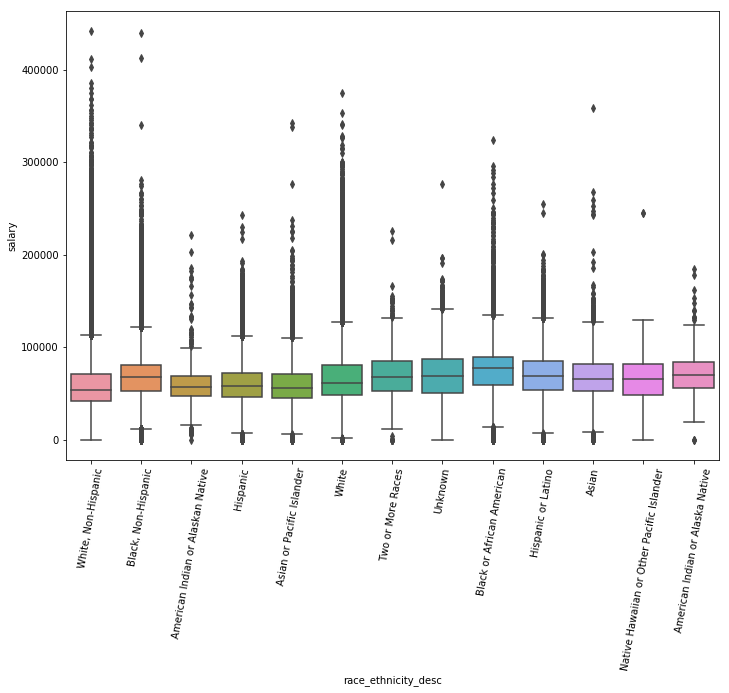

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation=80)
sns.boxplot(x="race_ethnicity_desc", y="salary", data=master_df)

In [18]:
race_teacher_experience=pd.pivot_table(data=master_df, index='race_ethnicity_desc', values='state_exp', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
race_teacher_experience

,amin,amax,median,mean,std,len
,state_exp,state_exp,state_exp,state_exp,state_exp,state_exp
race_ethnicity_desc,,,,,,
American Indian or Alaska Native,1.0,40.0,10.0,11.662768,7.558839,513.0
American Indian or Alaskan Native,1.0,42.0,6.0,8.774962,7.437240,1989.0
Asian,0.1,45.0,8.0,9.661024,7.337420,3810.0
Asian or Pacific Islander,0.2,44.0,7.0,9.176192,8.092560,14474.0
Black or African American,0.5,57.0,13.0,14.921921,9.930120,24547.0
"Black, Non-Hispanic",0.0,55.0,14.0,15.890946,10.778590,120308.0
Hispanic,0.4,45.0,8.0,10.243138,7.955514,55844.0
Hispanic or Latino,0.5,53.0,10.0,11.347113,7.909462,15745.0


In [19]:
gender_teacher_experience=pd.pivot_table(data=master_df, index='gender', values='state_exp', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
gender_teacher_experience

,amin,amax,median,mean,std,len
,state_exp,state_exp,state_exp,state_exp,state_exp,state_exp
gender,,,,,,
,1.0,4.0,2.5,2.333333,1.211060,6.0
F,0.0,63.0,11.0,13.147773,9.622711,1243446.0
M,0.0,57.0,11.0,14.004477,10.421402,381435.0


In [20]:
gender_race=pd.pivot_table(data=master_df, index=['race_ethnicity_desc', 'gender'], values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
gender_race

amin       amax  \
                                                    salary     salary   
race_ethnicity_desc                       gender                        
American Indian or Alaska Native          F           0.00  184340.00   
                                          M           0.00  161918.41   
American Indian or Alaskan Native         F          41.00  220973.56   
                                          M        6207.25  115346.00   
Asian                                     F           0.00  259065.05   
                                          M           0.00  358750.55   
Asian or Pacific Islander                 F           0.00  230610.77   
                                          M           0.00  341747.61   
Black or African American                 F           0.00  323866.46   
                                          M           0.00  295229.15   
Black, Non-Hispanic                       F           0.00  439803.00   
                                          M           0.00  340267.33   
Hispanic                                  F           0.00  191169.13   
                                          M           0.00  242825.66   
Hispanic or Latino                        F           0.00  200676.91   
                                          M           0.00  254426.14   
Native Hawaiian or Other Pacific Islander F           0.00  129173.57   
                                          M       11014.75  245000.00   
Two or More Races                         F           0.00  165765.00   
                                          M           0.00  225196.45   
Unknown                                           60533.00   60533.00   
                                          F           0.00  276454.20   
                                          M           0.00  196468.12   
White                                     F           0.00  315435.23   
                                          M           0.00  374302.00   
White, Non-Hispanic                       F           0.00  441612.00   
                                          M           0.00  411510.88   

                                                     median          mean  \
                                                     salary        salary   
race_ethnicity_desc                       gender                            
American Indian or Alaska Native          F       68757.110  68470.202396   
                                          M       74311.200  77297.633182   
American Indian or Alaskan Native         F       57668.000  59536.906661   
                                          M       56807.610  57899.705491   
Asian                                     F       64294.000  66736.070145   
                                          M       68974.630  71889.825731   
Asian or Pacific Islander                 F       54838.000  57880.939819   
                                          M       60912.940  64331.530166   
Black or African American                 F       78284.855  76475.627346   
                                          M       75427.660  77887.406813   
Black, Non-Hispanic                       F       67549.840  68258.279730   
                                          M       66718.020  69673.516562   
Hispanic                                  F       57354.610  60037.365752   
                                          M       59644.000  63468.429176   
Hispanic or Latino                        F       67833.600  69160.199903   
                                          M       70166.000  73509.148973   
Native Hawaiian or Other Pacific Islander F       65577.000  65613.085402   
                                          M       65191.240  71126.117576   
Two or More Races                         F       66502.805  68754.746818   
                                          M       69693.810  71612.774104   
Unknown                                           60533.000  60533.000000   
               

In [21]:
#Let's look at scatterplots of all floating point variables with our outcome, salary.
vars1=[i for i in master_df.columns if master_df[i].dtype=='float64']
vars1=[i for i in vars1 if 'zip' not in i]
vars1

['salary',
 'dist_exp',
 'state_exp',
 'out_of_state_exp',
 'assignment_2',
 'assignment_3',
 'assignment_4',
 'assignment_5',
 'assignment_6',
 'assignment_7',
 'pct_admin']

salary


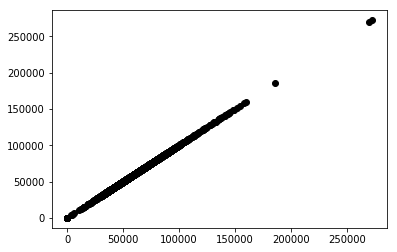

dist_exp


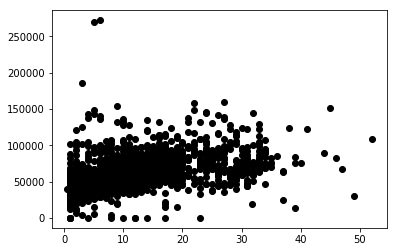

state_exp


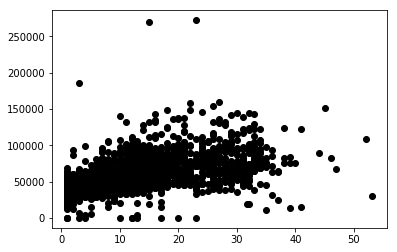

out_of_state_exp


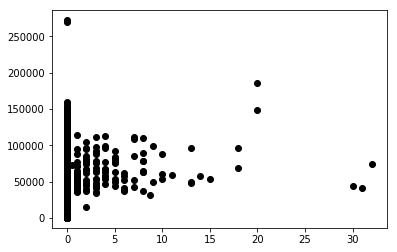

assignment_2


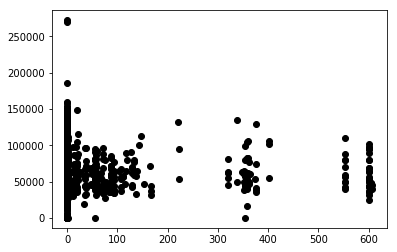

assignment_3


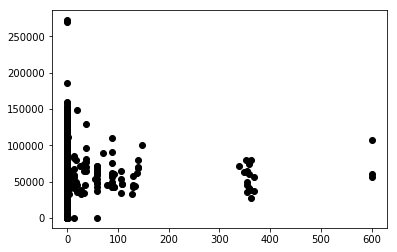

assignment_4


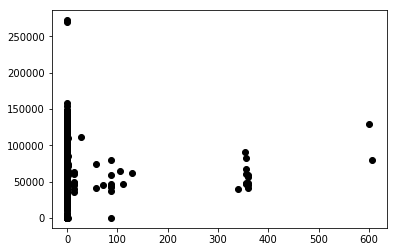

assignment_5


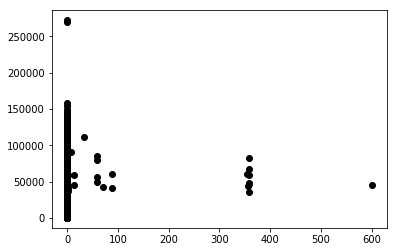

assignment_6


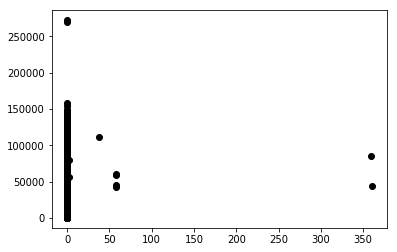

assignment_7


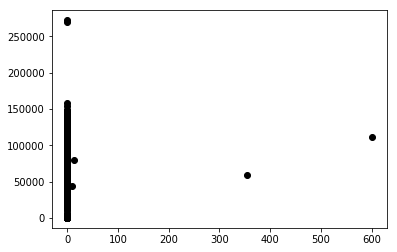

pct_admin


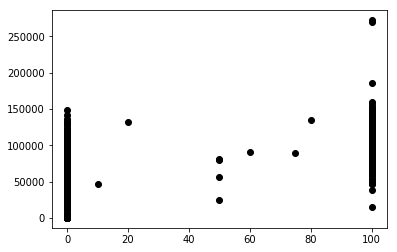

In [22]:
#Take a sample of the data to plot.
sample=master_df.sample(frac=.001)

for i in vars1:
    print (i)
    x=sample[i]
    y=sample['salary']
    plt.plot(x, y, 'o', color='black')
    plt.show()

In [23]:
corr=master_df.corr()

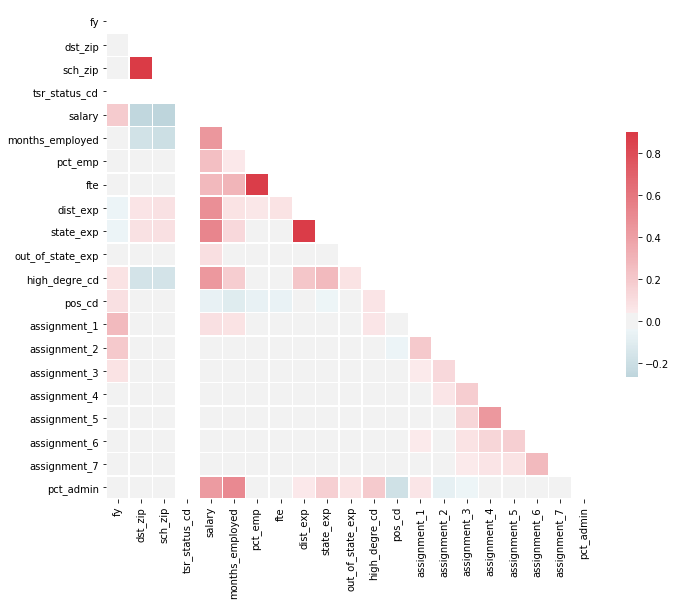

In [24]:

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
master_df.high_degre_desc.value_counts()

Masters                                   938798
Baccalaureate                             655266
Doctorate                                  21164
C.A.S., Specialist, 6 Year Certificate      5312
None                                        3937
Registered Nurse                             407
Name: high_degre_desc, dtype: int64

In [26]:
#Show one last table.  Interested in gender, education, and salary. 
gender_ed=pd.pivot_table(data=master_df, index=['high_degre_desc', 'gender'], values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
gender_ed

amin       amax  \
                                                 salary     salary   
high_degre_desc                        gender                        
Baccalaureate                          F           0.00  368000.00   
                                       M           0.00  230000.00   
C.A.S., Specialist, 6 Year Certificate F           0.00  287853.08   
                                       M           0.00  239492.92   
Doctorate                              F           0.00  402331.22   
                                       M           0.00  380227.46   
Masters                                        58286.42   61820.00   
                                       F           0.00  441612.00   
                                       M           0.00  411510.88   
None                                           60533.00   60533.00   
                                       F           0.00  193156.78   
                                       M           0.00  221013.27   
Registered Nurse                               13824.00   13824.00   
                                       F           0.00  116533.35   
                                       M        3051.02   49320.00   

                                                   median           mean  \
                                                   salary         salary   
high_degre_desc                        gender                              
Baccalaureate                          F        44912.500   47061.501854   
                                       M        48331.670   50616.389104   
C.A.S., Specialist, 6 Year Certificate F        73436.000   76275.966513   
                                       M        93162.700   94574.483629   
Doctorate                              F        93196.305   98957.228685   
                                       M       106795.000  115076.281175   
Masters                                         59697.000   59875.105000   
                                       F        64471.850   66764.943800   
                                       M        73967.900   77443.524200   
None                                            60533.000   60533.000000   
                                       F        40245.000   41156.221632   
                                       M        44966.250   45838.601683   
Registered Nurse                                13824.000   13824.000000   
                                       F        32843.000   31813.346582   
                                       M        40036.000   33206.971818   

                                                        std       len  
                                                     salary    salary  
high_degre_desc                        gender                          
Baccalaureate                          F       14859.929943  511455.0  
                                       M       15897.850069  143811.0  
C.A.S., Specialist, 6 Year Certificate F       31063.929209    2805.0  
                                       M       35265.994887    2507.0  
Doctorate                              F       42825.155802   12064.0  
                                       M       54701.130959    9100.0  
Masters                                         1480.692110       4.0  
                                       F       22220.960271  715093.0  
                                       M       27199.489326  223701.0  
None                                                    NaN       1.0  
                                       F       19515.488596    1633.0  
                                       M       19590.093845    2303.0  
Registered Nurse                                        NaN       1.0  
                                       F       19308.986198     395.0  
                                       M       15414.857523      11.0

In [27]:
bins = [0, 5, 10, 20, 40, 60]
labels = ["0-5 years","6-10 years","11-20 years", "21-40 years", "40-60 years"]
master_df['years_exp_state'] = pd.cut(master_df['state_exp'], bins=bins, labels=labels)
master_df.years_exp_state.value_counts()

11-20 years    456021
0-5 years      435186
21-40 years    379442
6-10 years     349517
40-60 years      4678
Name: years_exp_state, dtype: int64

In [28]:
exp_ed_gender=pd.pivot_table(data=master_df, index=['high_degre_desc', 'years_exp_state', 'gender'], values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
exp_ed_gender

amin  \
                                                                 salary   
high_degre_desc                        years_exp_state gender             
Baccalaureate                          0-5 years       F           0.00   
                                                       M           0.00   
                                       11-20 years     F           0.00   
                                                       M           0.00   
                                       21-40 years     F           0.00   
                                                       M           0.00   
                                       40-60 years     F           0.00   
                                                       M           0.00   
                                       6-10 years      F           0.00   
                                                       M           0.00   
C.A.S., Specialist, 6 Year Certificate 0-5 years       F           0.00   
                                                       M       15566.00   
                                       11-20 years     F           0.00   
                                                       M           0.00   
                                       21-40 years     F           0.00   
                                                       M           0.00   
                                       40-60 years     F           0.00   
                                                       M           0.00   
                                       6-10 years      F           0.00   
                                                       M           0.00   
Doctorate                              0-5 years       F           0.00   
                                                       M           0.00   
                                       11-20 years     F           0.00   
                                                       M           0.00   
                                       21-40 years     F           0.00   
                                                       M           0.00   
                                       40-60 years     F           0.00   
                                                       M           0.00   
                                       6-10 years      F           0.00   
                                                       M           0.00   
Masters                                0-5 years               58286.42   
                                                       F           0.00   
                                                       M           0.00   
                                       11-20 years     F           0.00   
                                                       M           0.00   
                                       21-40 years     F           0.00   
                                                       M           0.00   
                                       40-60 years     F           0.00   
                                                       M           0.00   
                                       6-10 years      F           0.00   
                                                       M           0.00   
None                                   0-5 years               60533.00   
                                                       F           0.00   
                                                       M           0.00   
                                       11-20 years     F           0.00   
                                                       M           0.00   
                                       21-40 years     F           0.00   
                                                       M           0.00   
                                       40-60 years     F       87009.00   
                                                       M       56232.11   
                                       6-10 years      F           0.00   
                 